In [34]:
#From:http://software.rc.fas.harvard.edu/ngsdata/workshops/2015_March/DESeq2_fruitfly.html
library('ggplot2')
library('DESeq2')
library('RColorBrewer')

Warning message:
: package ‘ggplot2’ was built under R version 3.2.3

Here we grab all files from new Kallisto run 
To obtain these Kallisto files: 
- We removed all mitochondrial genes, because they showed a very high amount of variation which we believed might cloud our results.
- We also used mean length of transcript from Lene file as input.


In [5]:
base_dir <- "~/Desktop/KallistoFiles/results2"
sample_names1<-list.files(base_dir)
sample_names1<-sample_names1[sample_names1!="Zi238_C4_AGTTCC"]
sample_names<-gsub('.{7}$', '', sample_names1)
sample_names
kal_dirs <- sapply(sample_names1, function(id) file.path(base_dir, id))

[1] "Fr188_C1" "Fr188_C2" "Fr188_C3" "Fr188_T3" "Fr188_T5" "Fr188_T6"
 [7] "Fr89_C1"  "Fr89_C2"  "Fr89_C4"  "Fr89_T3"  "Fr89_T4"  "Fr89_T5" 
[13] "Zi238_C1" "Zi238_C2" "Zi238_C3" "Zi238_T2" "Zi238_T3" "Zi238_T4"
[19] "Zi257_C1" "Zi257_C2" "Zi257_C3" "Zi257_T1" "Zi257_T2" "Zi257_T3"
[25] "Zi257_T4"

We create a count data dataframe to store the tpms from these files.  We convert these to integers.  We store these in a countData matrix.  

In [7]:
#variable countData: all of the tpm info for all of the Kallisto files, rounded to integers.

countData <- as.character(read.table(file.path(kal_dirs[1], "abundance.tsv"), header = TRUE)$target_id)
for (dir in kal_dirs){
  z<-read.table(file.path(dir, "abundance.tsv"), header=TRUE)
  countData<-data.frame(countData, as.integer(z$est_counts))  #converting to integers
}

#Setting row and column names for countData
colnames(countData)=c("target_id", sample_names1)
countData$target_id=read.table(file.path(kal_dirs[1], "abundance.tsv"), header = TRUE)$target_id
rownames(countData)=countData$target_id
countData$target_id=NULL

Now load conditions file

In [8]:
#variable colData: All of the conditions information for the differnt samples

#The conditions dataset is hiseq_infoAll
colData<-read.table("~/Desktop/KallistoFiles/hiseq_infoAll.txt", header=T, stringsAsFactors=FALSE, sep="\t")
colData<-colData[match(colnames(countData), colData$sample),]
colData
rownames(colData)=colData$sample
colData$sample = NULL
colData$lane = factor(colData$lane)
colData$lines = factor(colData$lines)

sample country lines tissue lane
1  Fr188_C1_TTAGGC      Fr   188      C    1
6  Fr188_C2_GATCAG      Fr   188      C    2
11 Fr188_C3_GGCTAC      Fr   188      C    1
16 Fr188_T3_GTCCGC      Fr   188      T    1
21 Fr188_T5_ATGTCA      Fr   188      T    2
2  Fr188_T6_CCGTCC      Fr   188      T    2
7   Fr89_C1_CGATGT      Fr    89      C    2
12  Fr89_C2_AGTCAA      Fr    89      C    2
17  Fr89_C4_CAGATC      Fr    89      C    1
22  Fr89_T3_ACTGAT      Fr    89      T    1
3   Fr89_T4_ATTCCT      Fr    89      T    1
8   Fr89_T5_GAGTGG      Fr    89      T    2
13 Zi238_C1_CAGATC      Zi   238      C    2
18 Zi238_C2_CTTGTA      Zi   238      C    2
23 Zi238_C3_ATCACG      Zi   238      C    2
9  Zi238_T2_TGACCA      Zi   238      T    1
14 Zi238_T3_ACAGTG      Zi   238      T    2
19 Zi238_T4_GCCAAT      Zi   238      T    1
24 Zi257_C1_TAGCTT      Zi   257      C    1
4  Zi257_C2_GTTTCG      Zi   257      C    2
10 Zi257_C3_GTGGCC      Zi   257      C    1
15 Zi257_T1_ATCACG      Zi   257      T    1
20 Zi257_T2_CGTACG      Zi   257      T    2
25 Zi257_T3_CGATGT      Zi   257      T    1
5  Zi257_T4_GTGAAA      Zi   257      T    2

In [9]:
#You can disregard this.
datasetInteract <- DESeqDataSetFromMatrix(countData = countData,
                                  colData = colData,
                                  design = ~lines + tissue+ lines:tissue+ lane)

dataset <- DESeqDataSetFromMatrix(countData = countData,
                                          colData = colData,
                                          design = ~lines + tissue+lane)

datasetNoLane <- DESeqDataSetFromMatrix(countData = countData,
                                            colData = colData,
                                            design = ~lines + tissue)

datasetNoLaneInteract <- DESeqDataSetFromMatrix(countData = countData,
                                        colData = colData,
                                        design = ~lines + tissue + lines:tissue)


Warning message:
In DESeqDataSet(se, design = design, ignoreRank): some variables in design formula are characters, converting to factorsWarning message:
In DESeqDataSet(se, design = design, ignoreRank): some variables in design formula are characters, converting to factorsWarning message:
In DESeqDataSet(se, design = design, ignoreRank): some variables in design formula are characters, converting to factorsWarning message:
In DESeqDataSet(se, design = design, ignoreRank): some variables in design formula are characters, converting to factors

In [15]:
##dataset C -- just carcass data
colDataC<-colData[colData$tissue=='C',]
countDataC<-countData[,colnames(countData) %in% rownames(colDataC)]
datasetC <- DESeqDataSetFromMatrix(countData = countDataC,
                                   colData = colDataC,
                                   design = ~lines + lane)

##dataset T -- just carcass data
colDataT<-colData[colData$tissue=='T',]
countDataT<-countData[,colnames(countData) %in% rownames(colDataT)]
datasetT <- DESeqDataSetFromMatrix(countData = countDataT,
                                   colData = colDataT,
                                   design = ~lines + lane)

In [14]:
ddsC<-DESeq(datasetC)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [16]:
ddsT<-DESeq(datasetT)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing


We constrast different lines with the carcass data.  The biggest difference is between 257 and 238.

In [21]:
print("lane 1 vs 2 (control)")
summary(results(ddsC, contrast=c('lane','1','2')), alpha=0.05)

print("lines 188 vs 238")
summary(results(ddsC, contrast=c('lines','188','238')), alpha=0.05) #nothing
print("lines 188 vs 89")
summary(results(ddsC, contrast=c('lines','188','89')), alpha=0.05) #nothing
print("lines 188 vs 257")
summary(results(ddsC, contrast=c('lines','188','257')), alpha=0.05) #something
print("lines 257 vs 238")
summary(results(ddsC, contrast=c('lines','257','238')), alpha=0.05) #something bigger
print("lines 257 vs 89")
summary(results(ddsC, contrast=c('lines','257','89')), alpha=0.05) #something 
print("lines 89 vs 238")
summary(results(ddsC, contrast=c('lines','89', '238')), alpha=0.05) #something

[1] "lane 1 vs 2 (control)"

out of 28822 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 13, 0.045% 
LFC < 0 (down)   : 11, 0.038% 
outliers [1]     : 634, 2.2% 
low counts [2]   : 3225, 11% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "lines 188 vs 238"

out of 28822 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 20, 0.069% 
LFC < 0 (down)   : 11, 0.038% 
outliers [1]     : 634, 2.2% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "lines 188 vs 89"

out of 28822 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 6, 0.021% 
LFC < 0 (down)   : 11, 0.038% 
outliers [1]     : 634, 2.2% 
low counts [2]   : 2707, 9.4% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "lines 188 vs 257"

We contrast different lines with the testes data -- all the effects are smaller, and the biggest effect is again 257 vs 238

In [22]:
print("lane 1 vs 2 (control)")
summary(results(ddsT, contrast=c('lane','1','2')), alpha=0.05)

print("lines 188 vs 238")
summary(results(ddsT, contrast=c('lines','188','238')), alpha=0.05) 
print("lines 188 vs 89")
summary(results(ddsT, contrast=c('lines','188','89')), alpha=0.05) 
print("lines 188 vs 257")
summary(results(ddsT, contrast=c('lines','188','257')), alpha=0.05) 
print("lines 257 vs 238")
summary(results(ddsT, contrast=c('lines','257','238')), alpha=0.05) #biggest effect (still not very big)
print("lines 257 vs 89")
summary(results(ddsT, contrast=c('lines','257','89')), alpha=0.05)  
print("lines 89 vs 238")
summary(results(ddsT, contrast=c('lines','89', '238')), alpha=0.05) 

[1] "lane 1 vs 2 (control)"

out of 28486 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 23, 0.081% 
LFC < 0 (down)   : 30, 0.11% 
outliers [1]     : 0, 0% 
low counts [2]   : 18160, 64% 
(mean count < 76)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "lines 188 vs 238"

out of 28486 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 14, 0.049% 
LFC < 0 (down)   : 19, 0.067% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "lines 188 vs 89"

out of 28486 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 12, 0.042% 
LFC < 0 (down)   : 21, 0.074% 
outliers [1]     : 0, 0% 
low counts [2]   : 546, 1.9% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "lines 188 vs 257"

out of 28

From above, we see that mostly there is a difference per line in the carcass data.  We do a LRT to see if line is significant, compared to the reduced model.

In [81]:
#variable rownames(results.line.ordered.C): the top genes (by adjusted pval) that show a difference by line in the carcass data

#line test for carcass
ddsC.line<-nbinomLRT(ddsC, reduced=~lane)
results.line.C<-results(ddsC.line)
results.line.ordered.C<-results.line.C[order(results.line.C$padj),]
summary(results.line.C)
results.line.C

found results columns, replacing these



out of 28822 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 266, 0.92% 
LFC < 0 (down)   : 593, 2.1% 
outliers [1]     : 251, 0.87% 
low counts [2]   : 3343, 12% 
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): lane 2 vs 1 
LRT p-value: '~ lines + lane' vs '~ lane' 
DataFrame with 30433 rows and 6 columns
              baseMean log2FoldChange      lfcSE       stat      pvalue
             <numeric>      <numeric>  <numeric>  <numeric>   <numeric>
FBtr0071764  15.313548      1.3235877  0.5726591   5.855813   0.1188399
FBtr0100521 138.134037      1.1131767  0.5843498   4.119913   0.2488034
FBtr0071763  65.232033     -1.8926582  1.3211874   1.731859   0.6298741
FBtr0342981   6.738338     -0.5496449  2.9557711   3.579142   0.3106418
FBtr0083388  43.318354     -0.2975736  0.4755669   4.709848   0.1943188
...                ...            ...        ...        ...         ...
FBtr0079286   21.58718   -1.323485959 1.10303953 14.7714020 0.002022798
FBtr0079333   10.07271    0.655915068 0.51251905  0.1061748 0.991086261
FBtr0079288  203.23186   -0.298199571 0.26493083  1.3749830 0.711409185
FBtr0343157 2532.97925   -0.006314007 0.09595999  5.7657193 0.123581786
FBtr0079289   22

In [53]:
#line test for testes
ddsT.line<-nbinomLRT(ddsT, reduced=~lane)
results.line.T<-results(ddsT.line)
results.line.ordered.T<-results.line.T[order(results.line.T$padj),]
summary(results.line.T)

found results columns, replacing these



out of 28486 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 152, 0.53% 
LFC < 0 (down)   : 150, 0.53% 
outliers [1]     : 0, 0% 
low counts [2]   : 2202, 7.7% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



From the above, we see that line is only all that significant in the carcass data.  It seems to have a much smaller effect in the testes data

Now we do a heatmap on the 500 most differentially expressed genes by lines in the carcass data, and it looks like things cluster by line and kind of by county too (ish).  We notice that Fr89_C4, and to some extent Zi238_C2 have a whole bunch of underexpressed genes. These are not strains that were flagged by our preliminary analysis in python as having too many zeros (see 20151027_EDA.ipynb).  [The other strain pointed out by the our EDA was Fr188_T3].  

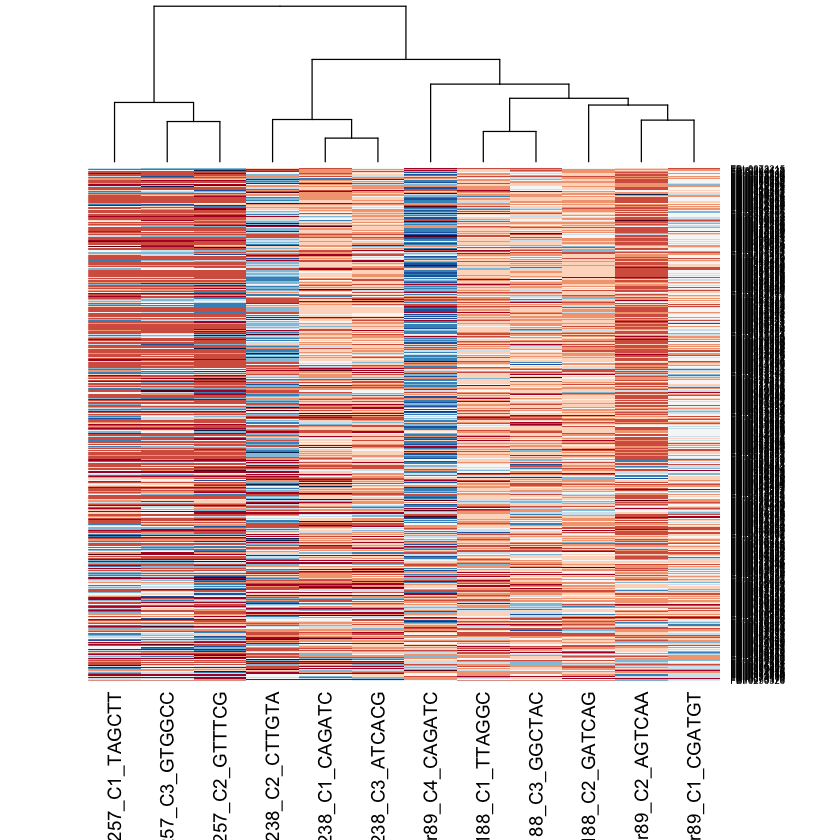

In [85]:
hmcol <- brewer.pal(11,'RdBu')
nCountsC <- counts(ddsC, normalized=TRUE)
heatmap(as.matrix(nCountsC[rownames(results.line.ordered.C)[1:500], ]), Rowv = NA, col = hmcol, mar = c(8,2))

We do the same for the testes data, and don't see any clustering by line

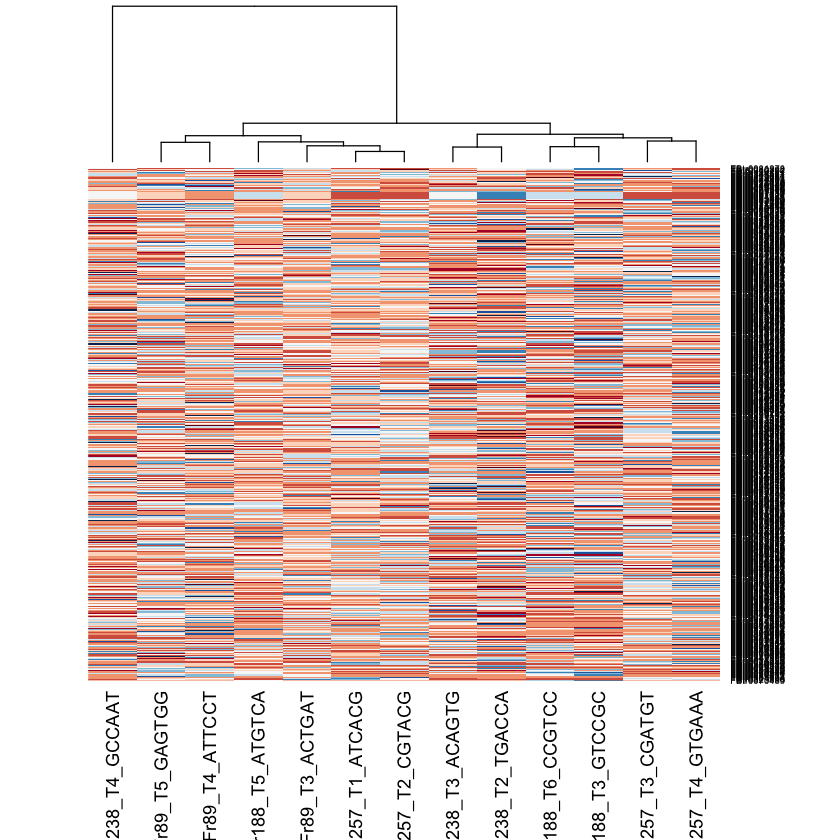

In [86]:
hmcol <- brewer.pal(11,'RdBu')
nCountsT <- counts(ddsT, normalized=TRUE)
heatmap(as.matrix(nCountsT[rownames(results.line.ordered.T)[1:500], ]), Rowv = NA, col = hmcol, mar = c(8,2))

We talked about being more stringent in removing outliers (the other big one that wasn't removed in this analysis was Fr188_T3), but it seems like we can ignore testes data for the time being because the differential expression signal is super low.

# Next step: compare found genes to Sackton GBE paper found genes

The 500 most differentially expressed genes by line are stored in: `rownames(results.line.ordered.T)[1:500]`

In [84]:
?counts

counts                 package:DESeq2                  R Documentation

_A_c_c_e_s_s_o_r_s _f_o_r _t_h_e '_c_o_u_n_t_s' _s_l_o_t _o_f _a _D_E_S_e_q_D_a_t_a_S_e_t _o_b_j_e_c_t.

_D_e_s_c_r_i_p_t_i_o_n:

     The counts slot holds the count data as a matrix of non-negative
     integer count values, one row for each observational unit (gene or
     the like), and one column for each sample.

_U_s_a_g_e:

     ## S4 method for signature 'DESeqDataSet'
     counts(object, normalized = FALSE,
       replaced = FALSE)
     
     ## S4 replacement method for signature 'DESeqDataSet,matrix'
     counts(object) <- value
     
_A_r_g_u_m_e_n_t_s:

  object: a ‘DESeqDataSet’ object.

normalized: logical indicating whether or not to divide the counts by
          the size factors or normalization factors before returning
          (normalization factors always preempt size factors)

replaced: after a ‘DESeq’ call, this argument will return the counts
          with outliers replaced instead of the original counts, and
          optionally ‘normalized’. The replaced counts are stored by
          ‘DESeq’ in ‘assays(object)[['replaceCounts']]’.

   value: an integer matrix

_A_u_t_h_o_r(_s):

     Simon Anders

_S_e_e _A_l_s_o:

     ‘sizeFactors’, ‘normalizationFactors’

_E_x_a_m_p_l_e_s:

     dds <- makeExampleDESeqDataSet(m=4)
     head(counts(dds))
     
     dds <- estimateSizeFactors(dds) # run this or DESeq() first
     head(counts(dds, normalized=TRUE))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

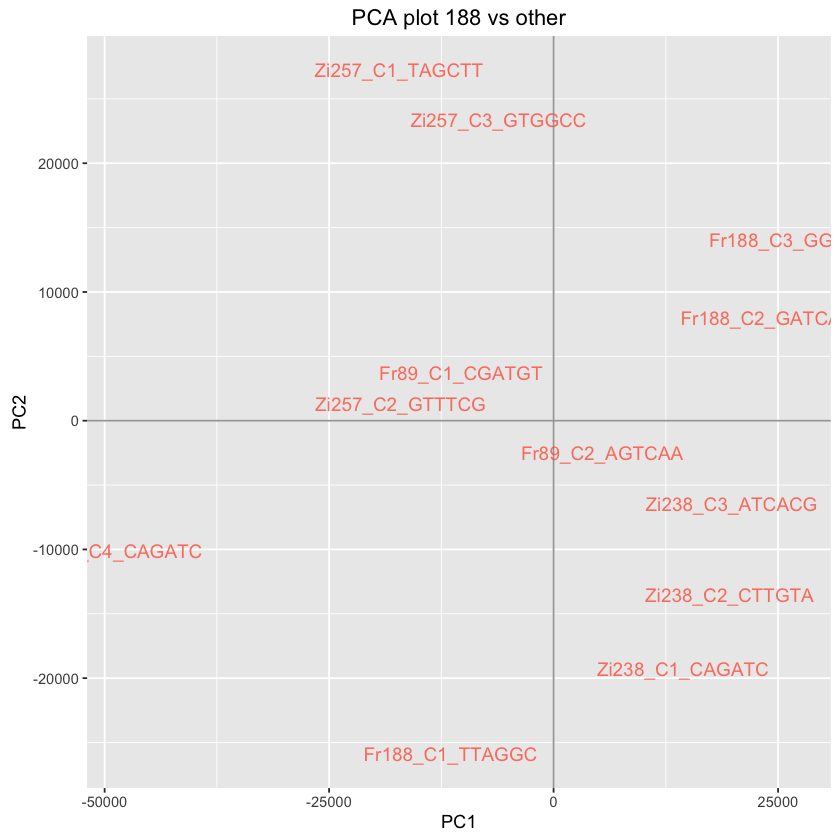

In [35]:
#get normalized counts
PCAnorm<-counts(ddsC, normalized=T)
order(results.line.ordered$padj)[1:50]
forPCA<-PCAnorm[order(r257vs238$padj)[1:5000], ]
pca1<-prcomp(t(PCAnorm))
# create data frame with scores
scores = as.data.frame(pca1$x)

# plot of observations
ggplot(data = scores, aes(x = PC1, y = PC2, label = rownames(scores))) +
  geom_hline(yintercept = 0, colour = "gray65") +
  geom_vline(xintercept = 0, colour = "gray65") +
  geom_text(colour = "tomato", alpha = 0.8, size = 4) +
  ggtitle("PCA plot 188 vs other")

In [26]:
?nbinomLRT

nbinomLRT                package:DESeq2                R Documentation

_L_i_k_e_l_i_h_o_o_d _r_a_t_i_o _t_e_s_t (_c_h_i-_s_q_u_a_r_e_d _t_e_s_t) _f_o_r _G_L_M_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function tests for significance of change in deviance between
     a full and reduced model which are provided as ‘formula’. Fitting
     uses previously calculated ‘sizeFactors’ (or
     ‘normalizationFactors’) and dispersion estimates.

_U_s_a_g_e:

     nbinomLRT(object, full = design(object), reduced, betaPrior = FALSE,
       betaPriorVar, maxit = 100, useOptim = TRUE, quiet = FALSE,
       useQR = TRUE)
     
_A_r_g_u_m_e_n_t_s:

  object: a DESeqDataSet

    full: the full model formula, this should be the formula in
          ‘design(object)’. alternatively, can be a matrix

 reduced: a reduced formula to compare against, e.g. the full model
          with a term or terms of interest removed. alternatively, can
          be a matrix

betaPrior: whether or not to put a zero-mean normal prior on the
          non-intercept coefficients While the beta prior is used
          typically, for the Wald test, it can also be specified for
          the likelihood ratio test. For more details on the
          calculation, see ‘nbinomWaldTest’.

betaPriorVar: a vector with length equal to the number of model terms
          including the intercept. which if missing is estimated from
          the rows which do not have any zeros

   maxit: the maximum number of iterations to allow for convergence of
          the coefficient vector

useOptim: whether to use the native optim function on rows which do not
          converge within maxit

   quiet: whether to print messages at each step

   useQR: whether to use the QR decomposition on the design matrix X
          while fitting the GLM

_D_e_t_a_i_l_s:

     The difference in deviance is compared to a chi-squared
     distribution with df = (reduced residual degrees of freedom - full
     residual degrees of freedom). This function is comparable to the
     ‘nbinomGLMTest’ of the previous version of DESeq and an
     alternative to the default ‘nbinomWaldTest’.

_V_a_l_u_e:

     a DESeqDataSet with new results columns accessible with the
     ‘results’ function.  The coefficients and standard errors are
     reported on a log2 scale.

_S_e_e _A_l_s_o:

     ‘DESeq’, ‘nbinomWaldTest’

_E_x_a_m_p_l_e_s:

     dds <- makeExampleDESeqDataSet()
     dds <- estimateSizeFactors(dds)
     dds <- estimateDispersions(dds)
     dds <- nbinomLRT(dds, reduced = ~ 1)
     res <- results(dds)